Y = X

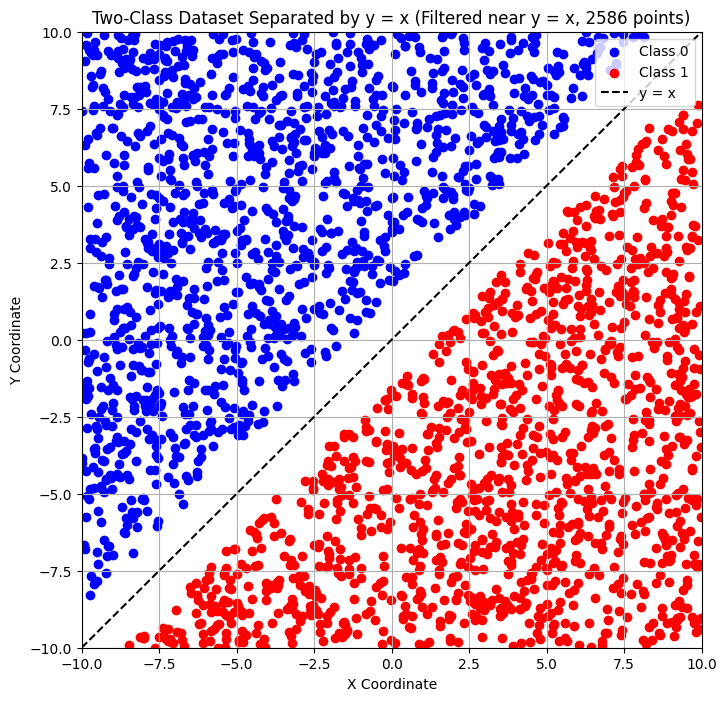

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import random

# Set random seed for reproducibility
random.seed(42)
np.random.seed(42)
torch.manual_seed(42)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(42)

# Number of points per class
num_points = 3000  
radius = 10        
min_distance = 1  

# Generate random points within a square [-radius, radius]^2
X = np.random.uniform(low=-radius, high=radius, size=(num_points, 2))

# Compute the distance of points to the line y = -x
distances = np.abs(X[:, 1] - X[:, 0]) / np.sqrt(2)

# Filter points that satisfy the distance condition
valid_indices = distances >= min_distance
X = X[valid_indices]
num_valid_points = X.shape[0]

# Classify points based on y = -x
y = np.where(X[:, 1] > X[:, 0], 0, 1)  # Class 0 if y > -x, else Class 1

# 5. Visualize the generated data
plt.figure(figsize=(8, 8))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Class 1')

# plot line y=x
plt.plot([-radius, radius], [-radius, radius], color='black', linestyle='--', label='y = x')

plt.xlim(-radius, radius)
plt.ylim(-radius, radius)
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title(f'Two-Class Dataset Separated by y = x (Filtered near y = x, {num_valid_points} points)')
plt.legend()
plt.grid()
plt.show()

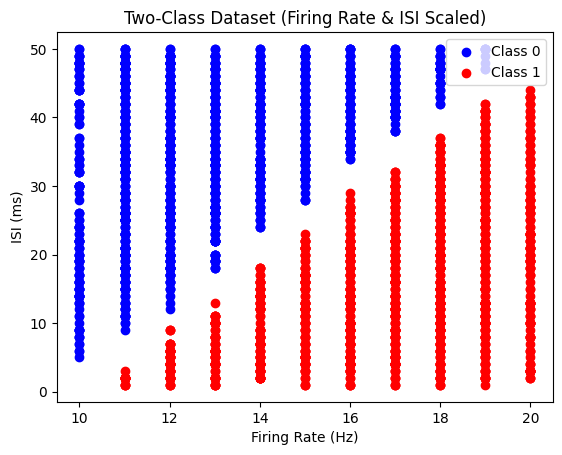

In [4]:
# Map to the integer coordinate range
def linear_map_to_integer(value, old_min, old_max, new_min, new_max):
    mapped = np.round((value - old_min) / (old_max - old_min) * (new_max - new_min) + new_min)
    return np.clip(mapped, new_min, new_max).astype(int)

# Map to specified ranges: firing rate [1, 50] Hz and ISI [1, 50] ms
X_min = X.min(axis=0)
X_max = X.max(axis=0)
firing_rates = linear_map_to_integer(X[:, 0], X_min[0], X_max[0], 10, 20)  # Hz
isis = linear_map_to_integer(X[:, 1], X_min[1], X_max[1], 1, 50)          # ms

# Visualize the data distribution in the mapped range
plt.scatter(firing_rates[y == 0], isis[y == 0], color='blue', label='Class 0')
plt.scatter(firing_rates[y == 1], isis[y == 1], color='red', label='Class 1')
plt.xlabel('Firing Rate (Hz)')
plt.ylabel('ISI (ms)')
plt.legend()
plt.title('Two-Class Dataset (Firing Rate & ISI Scaled)')
plt.show()



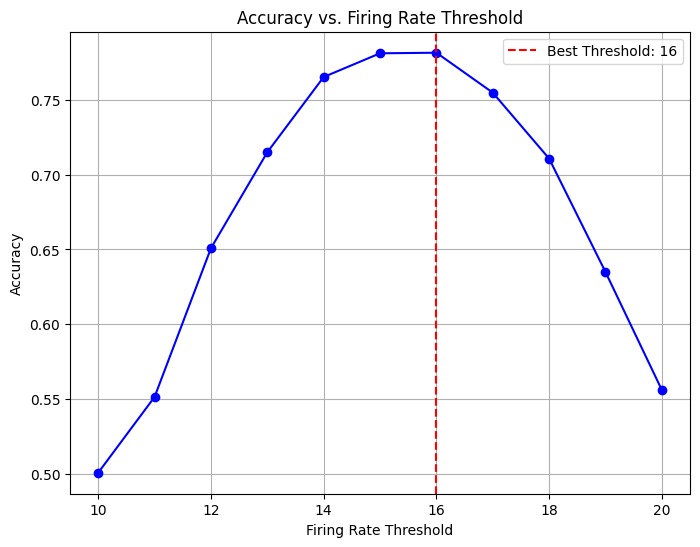

Best firing rate threshold: 16, Maximum Accuracy: 78.15%


In [7]:
# Searching for the best firing rate threshold for classification
firing_rate_thresholds = np.arange(firing_rates.min(), firing_rates.max() + 1)
best_threshold = None
best_accuracy = 0

accuracies = []
for threshold in firing_rate_thresholds:
    preds = np.where(firing_rates >= threshold, 1, 0)  # 只基于 firing rate 进行分类
    accuracy = np.mean(preds == y)  # 计算准确率
    accuracies.append(accuracy)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_threshold = threshold

# 绘制准确率随 firing rate 分割阈值的变化曲线
plt.figure(figsize=(8, 6))
plt.plot(firing_rate_thresholds, accuracies, marker='o', linestyle='-', color='b')
plt.axvline(best_threshold, color='r', linestyle='--', label=f'Best Threshold: {best_threshold}')
plt.xlabel('Firing Rate Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Firing Rate Threshold')
plt.legend()
plt.grid(True)
plt.show()

print(f"Best firing rate threshold: {best_threshold}, Maximum Accuracy: {best_accuracy:.2%}")